# Hi!!!
This is the 2nd Part of a 3 Part Series on Image Processing. If You are New to Image Processing, Please Check [Part 1](https://www.kaggle.com/deshwalmahesh/image-processing-1-basic-ocr-feature-pooling-conv) where I have briefly explained mant things for image processing such as Basic operations on images like reading, cropping, resizing, flipping, color space conversion etc.. And the nsome intermediate steps like Convolution, Pooling, Custom Filters, Reconstruction using Erosion, Dilation , Finding Convex Hull, Noise Reduction, Histogram, Feature Detection, OCR to read itext from data and how to compare 2 images using Structural Similarity.

In this Notebook We'll be covering:
1. Contour Detection
2. Edge Detection
3. Corner Detection
4. Thresholding to Seperate Object From Backgrounf using Canny, Median, Yen etc
5. Working of Sobel Filters

Please do check out [Part3](https://www.kaggle.com/deshwalmahesh/image-processing-3-segmentation-autoencoder-dictl) for advanced Image Segmentation and object seperation using Canny, Sobel and Watrshed Algo. Autoencoders to find Latent features to denoise image and fanomaly detector, Dictonary Learning to decrease dimensionality.

In [13]:
import numpy as np
from skimage.io import imread
from skimage import measure
from skimage import color
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import util
from skimage import filters
from scipy import ndimage
from skimage import feature
from skimage import transform
from skimage import draw
import pandas as pd
from PIL import Image

PATH = '/kaggle/input/image-processing/' # Data PAth

# Contour Detection
Find the area or lines where pixel intensities are same. Our module will be using the **Marching Squares Algorithm** for contour detection. Contour detection is hugely used for mapping of areas at same level such in geography to find out areas at same sea level.

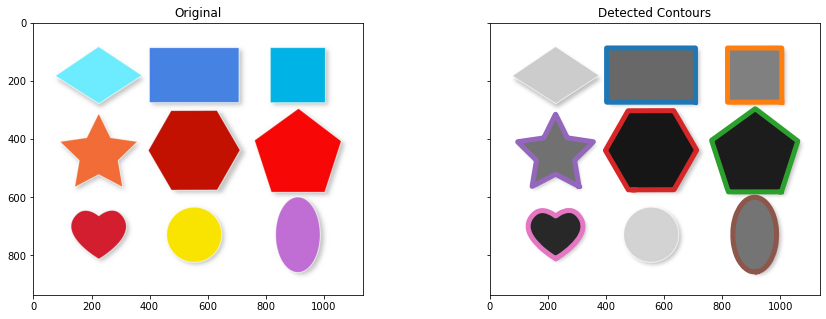

In [9]:
img = imread(PATH+'shapes.jpg')
gray_img = color.rgb2gray(img)

contours = measure.find_contours(gray_img,level=0.7)

f,ax = plt.subplots(1,2,figsize=(15,5),sharex=True,sharey=True)
ax = ax.ravel()

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(gray_img,cmap='gray')
for n,contour in enumerate(contours):
    ax[1].plot(contour[:,1],contour[:,0],lw=5)
ax[1].set_title('Detected Contours')
       
plt.show()

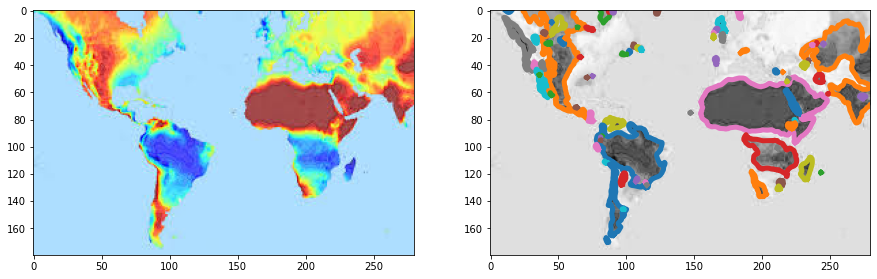

In [10]:
img = imread(PATH+'contour.jpeg')
gray_img = color.rgb2gray(img)

contours = measure.find_contours(gray_img,level=0.66)

f,ax = plt.subplots(1,2,figsize=(15,5))
ax[1].imshow(gray_img,cmap='gray')

ax[0].imshow(img)
for n,contour in enumerate(contours):
    ax[1].plot(contour[:,1],contour[:,0],lw=5)

# Edge Detection
1. Search Based Algo (Firt order Partial Derivatives)
2. Zero Crossing (Second order PArtial Derivatives)

Idea is to see the values where there is abrupt change in pixel intensities. 

**Working:**
1. Find the derivatives of X and Y to see where there are intnsities changing. I can be X,Y or some direction .
2. Find the Gradients of Magnitude. What does that even mean?? It means to find the exact direction where the intensities are getting to a minimum or maximum.
3. Apply a threshold on gradient to say "okay! at this threshold, the gradients are making sense and giving me edges"

**GENERAL STEPS TO APPLY BEFORE EDGE DETECTION METHODS**

Always Convert  to Grayscale
1. Smoothening Images ( Bilateral or Gaussian Filters) (Large Sigma in Gaussian Filter, Less Sensitive to Noise and detects only Large Edges are detected)
2. Enhance Image (Sharpening)
3. Detect Edge
4. If not good, apply a few more of Steps 1 and 2

## Search Based
### Sobel and Roberts Edge Detection Algo
They use a sliding Kernel specially designed to detect the edges which is iterated over the whole image in steps. Sounds familiar? Yes, Exactly. It is Convolution Function with Sobel Kernel.

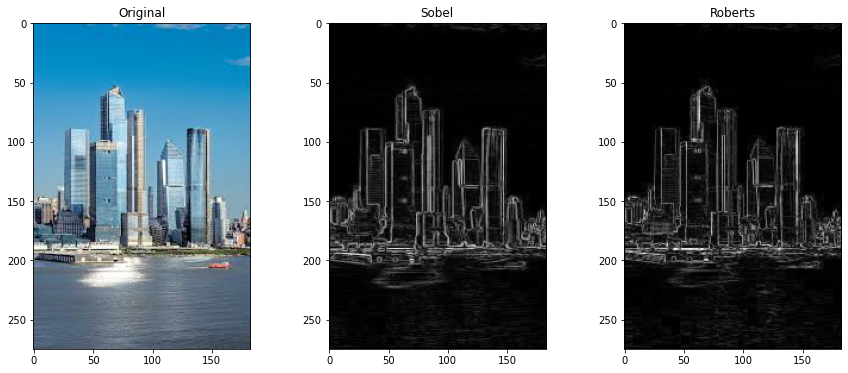

In [11]:
buildings = imread(PATH+'buildings.jpeg')
gray_buildings = color.rgb2gray(buildings) # convert to gray scale

# use gauss or bilateral filters and sharpening here but as our image is in good quailt, we don't need

sobel_edges = filters.sobel(gray_buildings)
roberts_edges = filters.roberts(gray_buildings)

f,ax = plt.subplots(1,3,figsize=(15,6))

ax[0].imshow(buildings)
ax[0].set_title('Original')

ax[1].imshow(sobel_edges,cmap='gray')
ax[1].set_title('Sobel')

ax[2].imshow(roberts_edges,cmap='gray')
ax[2].set_title('Roberts')

plt.show()

## Zero Crossing
### Canny
Enhances Signal to Noise Ratio so that it can be used in noisy images too

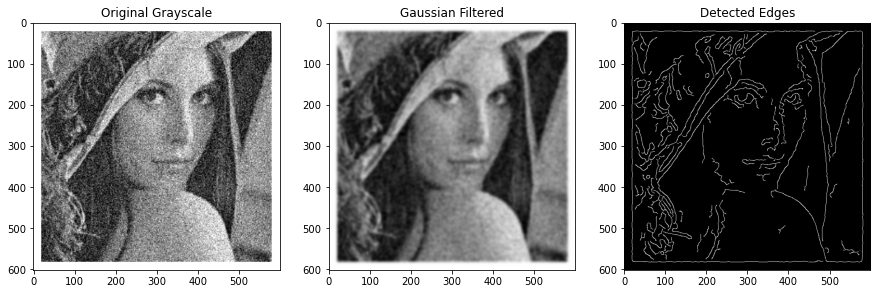

In [16]:
noisy_img = np.array(Image.open(PATH+'noisy image.png'))
noisy_gray = color.rgb2gray(noisy_img)
filtered_img = ndimage.gaussian_filter(noisy_img,sigma=(3,3)) # sigma can be in terms of a single float 
detected = feature.canny(filtered_img,sigma=0.7)

f,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(noisy_gray,cmap='gray')
ax[0].set_title('Original Grayscale')

ax[1].imshow(filtered_img,cmap='gray')
ax[1].set_title('Gaussian Filtered')

ax[2].imshow(detected,cmap='gray')
ax[2].set_title('Detected Edges')
plt.show()

# Corner Detection
## Harris Corner Detection Algorithm
Corners have very low self similarity means they are different from the other neighbouring points in some way be it intensity or something else. Suppress the weak points or weak corners to get just the strong or sharp corners.

### Find Corners

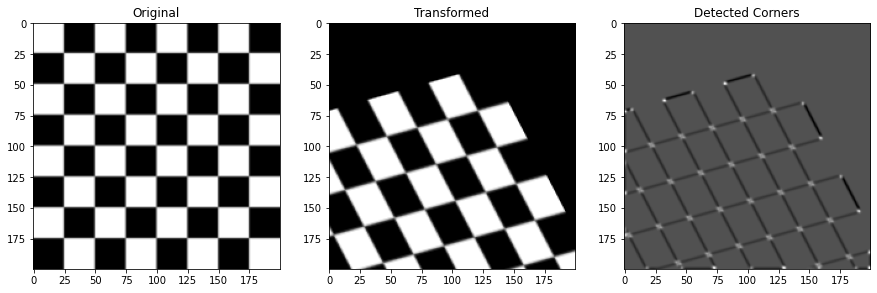

In [17]:
board = data.checkerboard()
transform_obj = transform.AffineTransform(scale=(0.91,0.87),rotation=(0.23),shear=0.33,
                                          translation=(101,-53))
# translation will shift the image pixels to (x+x_trans,y+y_trans) position or it can shift the image from
# - top to bottom or right left if given coordinates
# scaling is increasing or decreasing the size of image by a factor
# shear works like changing a square to a rhomboid

transformed_img = transform.warp(board,transform_obj)
corner_img = feature.corner.corner_harris(transformed_img)

f,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(board,cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(transformed_img,cmap='gray')
ax[1].set_title('Transformed')

ax[2].imshow(corner_img,cmap='gray')
ax[2].set_title('Detected Corners')
plt.show()

### Find Statistical Significance
Find if a corner is actually a corner made by intesection of two lines or just a single point

In [18]:
x_y_corner_coords = feature.corner.corner_peaks(corner_img)
x_y_corner_sub = feature.corner.corner_subpix(transformed_img,x_y_corner_coords) # change window size param
# find the subpixels
df = pd.DataFrame() # to compare the difference in the corner positions
df['X Before'] = x_y_corner_coords[:,0]
df['X After'] = x_y_corner_sub[:,0]
df['Y Before'] = x_y_corner_coords[:,1]
df['Y After'] = x_y_corner_sub[:,1]
df.head()

,X Before,X After,Y Before,Y After
0,43,41.857414,104,104.794076
1,49,48.582612,81,80.236190
2,57,55.730054,55,55.628079
3,63,62.438531,32,31.030690
4,65,64.530482,144,144.902529


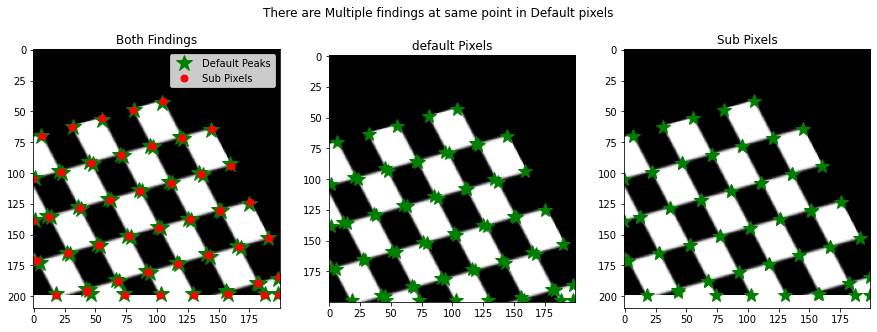

In [19]:
f,ax = plt.subplots(1,3,figsize=(15,5))
f.suptitle('There are Multiple findings at same point in Default pixels')

ax[0].imshow(transformed_img,cmap='gray')
ax[0].set_title('Both Findings')
ax[0].plot(x_y_corner_coords[:,1],x_y_corner_coords[:,0],color='green',markersize=17,ls='none',marker='*',
           label='Default Peaks')

ax[0].plot(x_y_corner_sub[:,1],x_y_corner_sub[:,0],color='red',markersize=7,ls='none',marker='o',
           label='Sub Pixels')

ax[0].legend()


ax[1].imshow(transformed_img,cmap='gray')
ax[1].set_title('default Pixels')
ax[1].plot(x_y_corner_coords[:,1],x_y_corner_coords[:,0],color='green',markersize=15,ls='none',marker='*')

ax[2].imshow(transformed_img,cmap='gray')
ax[2].set_title('Sub Pixels')
ax[2].plot(x_y_corner_sub[:,1],x_y_corner_sub[:,0],color='green',markersize=15,ls='none',marker='*')


plt.show()

# Object Detection/Separation
## Thresholding
Classify Pixels of an image in diffrent categories(black/white, Foreground/Background etc) and can be seen as a method to create **Binary** image from a **Grayscale** image and segment objects from the background. **All the Pixels greater than the threshold belongs to one category and the pixels less than belongs to other one**
1. Global or Histogram Based: Fast but uses the Historam of the whole image pixels intensities but ignores relation among neighbouring pixels.
2. Local Thresholding: Slow, Computationally Expensive but considers local or neighbouring pixels

### Global Algorithm
A Bimodal Histogram of an image can be separated into two different histograms of a grayscale image which means are there are mainly 2 different types of distributions of pixels one of which belongs to `blackish` and other `whitish` or in other words, one of those belongs to image and other belongs to background.
If you want to know more about the Histogram Representation, You can [check Part-1](#)
#### Otsu Threshold
One of the most used thresholding algorithm. Otsu's thresholding method involves iterating through all the possible threshold values and calculating a measure of spread (variance) for the pixel levels each side of the threshold, i.e. the pixels that either fall in foreground or background. The aim is to find the threshold value where the sum of foreground and background spreads is at its minimum. OR
**Find a threshold value where `intra` class Variance is Minimal and `Inter-class` Variance is Maximal**

Otsu Threshold of Grayscale Image is: 0.392486568627451
Otsu Threshold of Inverted Grayscale Image is: 0.603646568627451


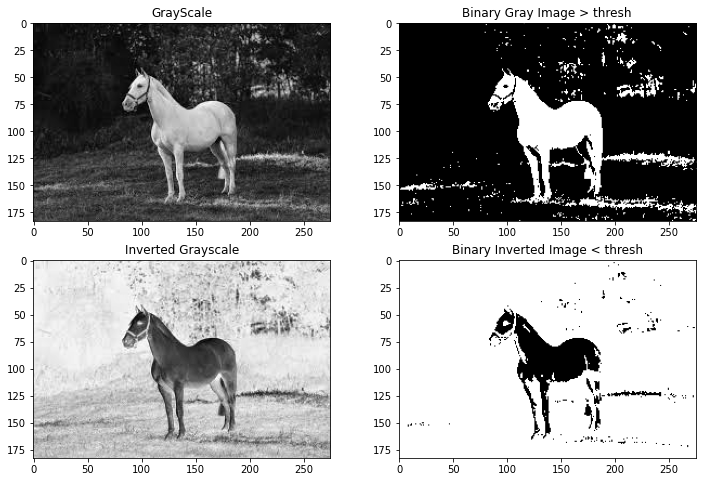

In [20]:
# You can define your OWN Foreground and Background so I have used the inverted image too

img = imread(PATH+'bimodal.jpeg')
gray = color.rgb2gray(img)
gray_invert = util.invert(gray) # just to demonstrate that it just separates the bimodal histogram
thresh_gray= filters.threshold_otsu(gray)
thresh_invert = filters.threshold_otsu(gray_invert)
print(f'Otsu Threshold of Grayscale Image is: {thresh_gray}')
print(f'Otsu Threshold of Inverted Grayscale Image is: {thresh_invert}')

binary_gray = gray > thresh_gray
binary_invert = gray < thresh_invert

f,ax = plt.subplots(2,2,figsize=(12,8))
ax = ax.ravel()

ax[0].imshow(gray,cmap='gray')
ax[0].set_title('GrayScale')

ax[1].imshow(binary_gray,cmap='gray')
ax[1].set_title('Binary Gray Image > thresh')

ax[2].imshow(gray_invert,cmap='gray')
ax[2].set_title('Inverted Grayscale')

ax[3].imshow(binary_invert,cmap='gray')
ax[3].set_title('Binary Inverted Image < thresh')

plt.show()

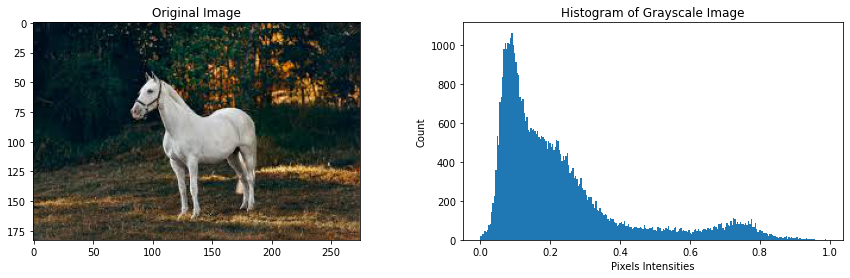

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,4))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].hist(gray.ravel(),bins=256)
ax[1].set_title('Histogram of Grayscale Image')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Pixels Intensities')
plt.show()

There are 2 peaks going around 0.1 and 0.7 means the forest or bakground lies in 0.1 distribution as it makes the most of the part and the horse lies in 0.7 and that is exactly why this image is separable so clearly.

**TRY USING THE ABOVE IMLEMENTATION ON `buildings.jpeg` or `archi.jpeg` and check Histogram**

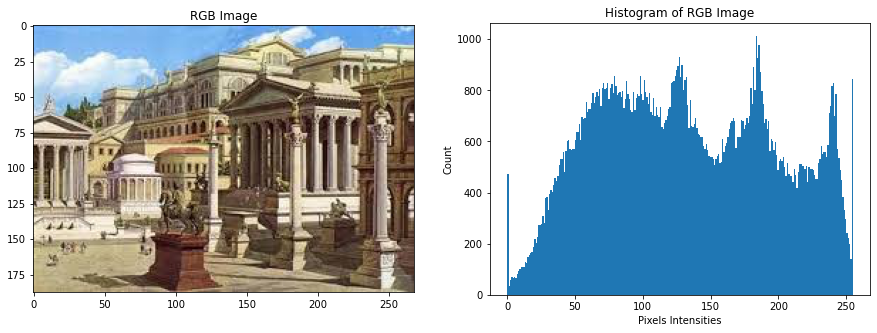

In [22]:
rgb_img = imread(PATH+'archi.jpeg')
img = color.rgb2gray(rgb_img)

f,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(rgb_img)
ax[0].set_title('RGB Image')

ax[1].hist(rgb_img.ravel(),bins=256) #nota bimodal histogram
ax[1].set_title('Histogram of RGB Image')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Pixels Intensities')
plt.show()

#### Try all the thresholds
Because it is hard to find the optimal value in case images are not clearly bimodal. 

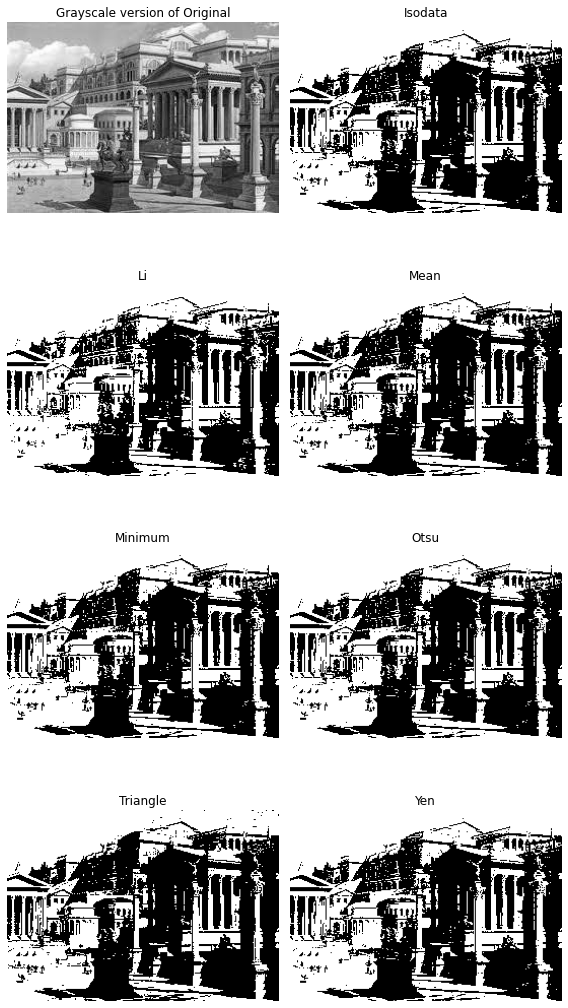

In [23]:
f,ax = filters.try_all_threshold(img,verbose=False,figsize=(8,15))
_ = ax[0].set_title('Grayscale version of Original')

### Local Thresholding
**Very Useful for the images where there are large variations in the background. Just like in the buildings images. It provides more details**

Local Threshold: [[0.6720083  0.67190116 0.67170188 ... 0.68066501 0.68108972 0.68129277]
 [0.67230402 0.6721975  0.67199935 ... 0.6801635  0.68056972 0.68076365]
 [0.6729123  0.67280716 0.67261146 ... 0.67928358 0.679655   0.67983178]
 ...
 [0.68418348 0.68398112 0.68358214 ... 0.39266828 0.3872034  0.38446444]
 [0.68334838 0.68315293 0.68276705 ... 0.39470295 0.38923858 0.38649885]
 [0.68291996 0.68272793 0.68234849 ... 0.39573543 0.3902712  0.387531  ]]


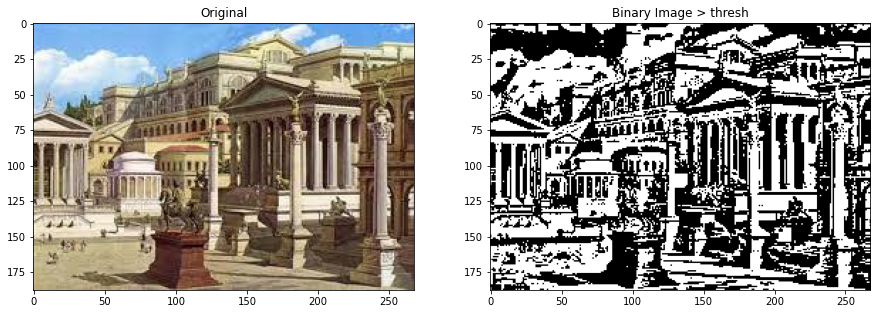

In [24]:
img = imread(PATH+'archi.jpeg')
gray = color.rgb2gray(img)
thresh = filters.threshold_local(gray,block_size=37) # 37 pixels makes a block or neighbour
print(f'Local Threshold: {thresh}')

binary = gray > thresh

f,ax = plt.subplots(1,2,figsize=(15,6))
ax = ax.ravel()

ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(binary,cmap='gray')
ax[1].set_title('Binary Image > thresh')

plt.show()

# Continue...
I'll be writing a specialised notebook about the `Object Segmentation` in the next part.